In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import os

In [2]:
!pwd

/home/wjiang33/dic_exp


In [3]:
import cartopy.crs as ccrs

In [4]:
map_path = '/sciserver/filedb02-02/ocean/wenrui_temp/dic_exp/map1.zarr'
table_path = '/sciserver/filedb02-02/ocean/wenrui_temp/dic_exp/table1.zarr'

In [5]:
maps_ds = xr.open_zarr(map_path)
tb  =xr.open_zarr(table_path)

In [6]:
tb

<xarray.Dataset>
Dimensions:   (time: 3000, space: 10196)
Dimensions without coordinates: time, space
Data variables: (12/30)
    c_dif_h   (time, space) float64 dask.array<chunksize=(188, 1275), meta=np.ndarray>
    c_dif_v   (time, space) float64 dask.array<chunksize=(188, 1275), meta=np.ndarray>
    cdicpflx  (time, space) float64 dask.array<chunksize=(188, 1275), meta=np.ndarray>
    cdicrdop  (time, space) float64 dask.array<chunksize=(188, 1275), meta=np.ndarray>
    cerror    (time, space) float64 dask.array<chunksize=(188, 1275), meta=np.ndarray>
    cf        (time, space) float64 dask.array<chunksize=(188, 1275), meta=np.ndarray>
    ...        ...
    p_dif_h   (time, space) float64 dask.array<chunksize=(188, 1275), meta=np.ndarray>
    p_dif_v   (time, space) float64 dask.array<chunksize=(188, 1275), meta=np.ndarray>
    perror    (time, space) float64 dask.array<chunksize=(188, 1275), meta=np.ndarray>
    pf        (time, space) float64 dask.array<chunksize=(188, 1275), meta=np.ndarray>
    pl        (time, space) float64 dask.array<chunksize=(188, 1275), meta=np.ndarray>
    plhs      (time, space) float64 dask.array<chunksize=(188, 1275), meta=np.ndarray>

In [7]:
tb['iz'][0,0].values

array(1.)

In [8]:
np.array(tb['iz'][0])

array([1., 1., 1., ..., 7., 7., 7.])

In [9]:
ind = list(np.array(tb[var][0].chunk((9973))).astype(int) for var in ['iz','iy','ix'])
ind[0]-=1
ind = tuple(ind)

In [10]:
indf = list(np.array(tb[var][-1].chunk((9973))).astype(int) for var in ['iz','iy','ix'])
indf[0]-=1
indf = tuple(indf)

In [11]:
ds = xr.open_zarr('/sciserver/filedb02-02/ocean/wenrui_temp/dic_exp/bgc_tutorial.zarr')
bu = xr.open_zarr('/sciserver/filedb02-02/ocean/wenrui_temp/dic_exp/bgc_tutorial_budget.zarr')
ds = xr.merge([ds,bu])

In [12]:
from mattia import densjmd95

In [13]:
rho = densjmd95(ds.S, ds.Temp, 0)-1000
rhom = rho.mean(dim = 'time_outer').persist()

In [14]:
rho0 = np.array(rho[0]+rho[1])/2
rhof = np.array(rho[-1]+rho[-2])/2

In [15]:
r0 = np.array(rho0)[ind] 

In [16]:
sf = np.array(ds.S[-1])[indf]
tf = np.array(ds.Temp[-1])[indf]

In [17]:
t0 = 0.5
t1 = 4
s0 = 34.4
ind_bw = np.where(tf<=t0)[0]
ind_dw = np.where(np.logical_and(np.logical_and(tf>t0,sf>s0),tf<=t1))[0]
ind_iw = np.where(np.logical_and(tf>t0,sf<=s0))[0]
ind_lw = np.where(np.logical_and(np.logical_and(tf>t0,sf>s0),tf>t1))[0]
print(
    len(ind_bw),
    len(ind_dw),
    len(ind_iw),
    len(ind_lw),
)

1084 1898 2864 4350


In [18]:
# ind_bw = np.where(r0>27.4)[0]
# ind_dw = np.where(np.logical_and(r0<=27.4,r0>27.1))[0]
# ind_iw = np.where(r0<=27.1)[0]

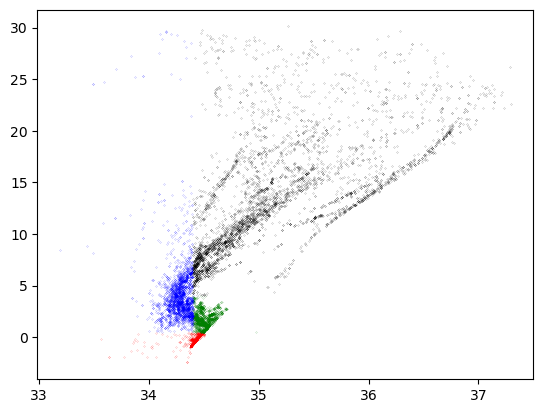

In [19]:
plt.plot(sf[ind_bw],tf[ind_bw],'o',markersize = 0.1,c = 'r')
plt.plot(sf[ind_dw],tf[ind_dw],'o',markersize = 0.1,c = 'g')
plt.plot(sf[ind_iw],tf[ind_iw],'o',markersize = 0.1,c = 'b')
plt.plot(sf[ind_lw],tf[ind_lw],'o',markersize = 0.1,c = 'k')

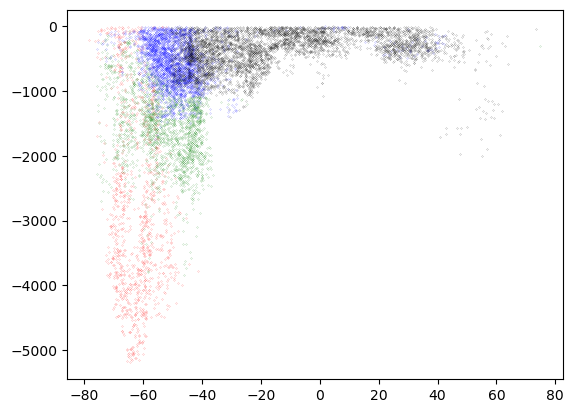

In [20]:
plt.plot(tb.lat[-1][ind_bw],tb.dep[-1][ind_bw],'o',markersize = 0.1,c = 'r')
plt.plot(tb.lat[-1][ind_dw],tb.dep[-1][ind_dw],'o',markersize = 0.1,c = 'g')
plt.plot(tb.lat[-1][ind_iw],tb.dep[-1][ind_iw],'o',markersize = 0.1,c = 'b')
plt.plot(tb.lat[-1][ind_lw],tb.dep[-1][ind_lw],'o',markersize = 0.1,c = 'k')

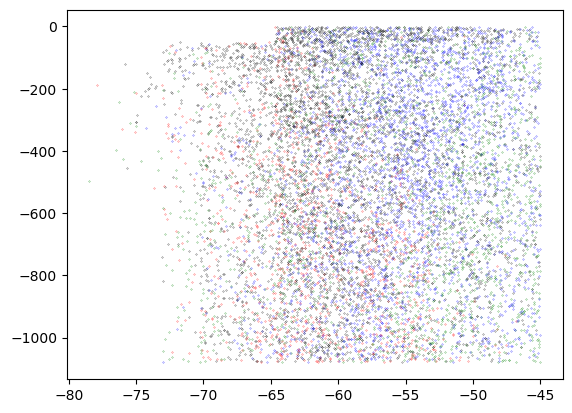

In [21]:
plt.plot(tb.lat[0][ind_bw],tb.dep[0][ind_bw],'o',markersize = 0.2,c = 'r')
plt.plot(tb.lat[0][ind_dw],tb.dep[0][ind_dw],'o',markersize = 0.2,c = 'g')
plt.plot(tb.lat[0][ind_iw],tb.dep[0][ind_iw],'o',markersize = 0.2,c = 'b')
plt.plot(tb.lat[0][ind_lw],tb.dep[0][ind_lw],'o',markersize = 0.2,c = 'k')

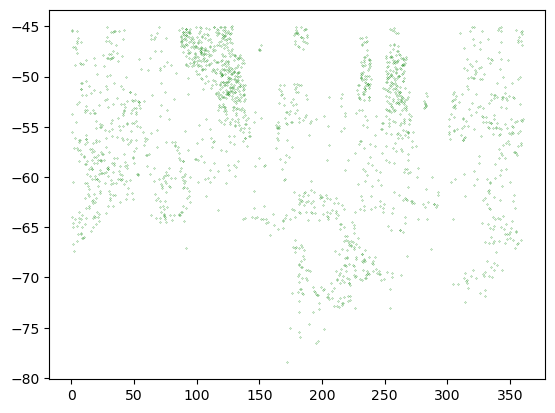

In [22]:
# plt.plot(tb.lon[0,ind_bw],tb.lat[0,ind_bw],'o',markersize = 0.2,c = 'r')
plt.plot(tb.lon[0,ind_dw],tb.lat[0,ind_dw],'o',markersize = 0.2,c = 'g')
# plt.plot(tb.lon[0,ind_iw],tb.lat[0,ind_iw],'o',markersize = 0.2,c = 'b')
# plt.plot(tb.lon[0,ind_lw],tb.lat[0,ind_lw],'o',markersize = 0.2,c = 'k')

In [23]:
# tb['s_p'] = tb['negbio']+tb['dicpflx']+tb['dicrdop']
tb['total_bio'] = tb['cdicpflx']+tb['cdicrdop']+tb['cnegbio']

In [24]:
bw = tb.isel(space = ind_bw)
dw = tb.isel(space = ind_dw)
iw = tb.isel(space = ind_iw)
lw = tb.isel(space = ind_lw)

In [25]:
mean_bw = tb.isel(space = ind_bw).mean(dim = 'space')
mean_dw = tb.isel(space = ind_dw).mean(dim = 'space')
mean_iw = tb.isel(space = ind_iw).mean(dim = 'space')
mean_lw = tb.isel(space = ind_lw).mean(dim = 'space')

In [26]:
mean = tb.mean(dim = 'space')

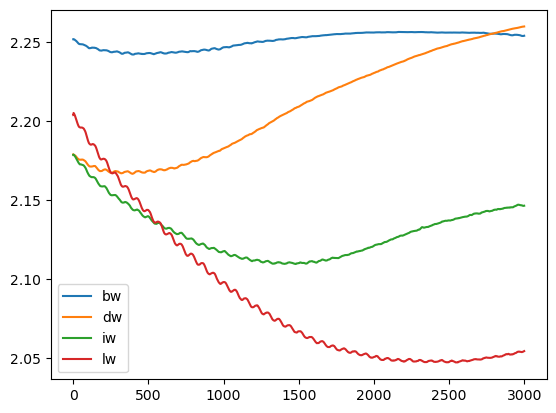

In [27]:
plt.plot(mean_bw.cl,label = 'bw')
plt.plot(mean_dw.cl,label = 'dw')
plt.plot(mean_iw.cl,label = 'iw')
plt.plot(mean_lw.cl,label = 'lw')
plt.legend()

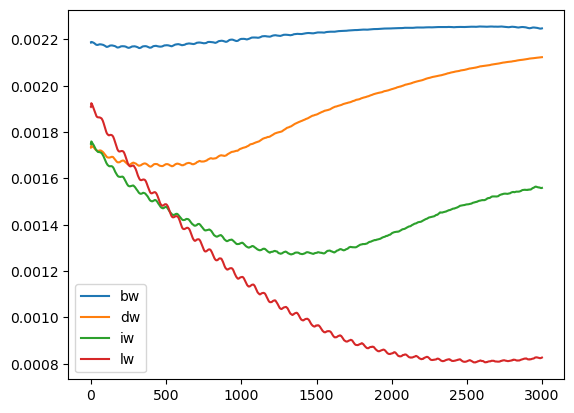

In [28]:
plt.plot(mean_bw.pf,label = 'bw')
plt.plot(mean_dw.pf,label = 'dw')
plt.plot(mean_iw.pf,label = 'iw')
plt.plot(mean_lw.pf,label = 'lw')
plt.legend()

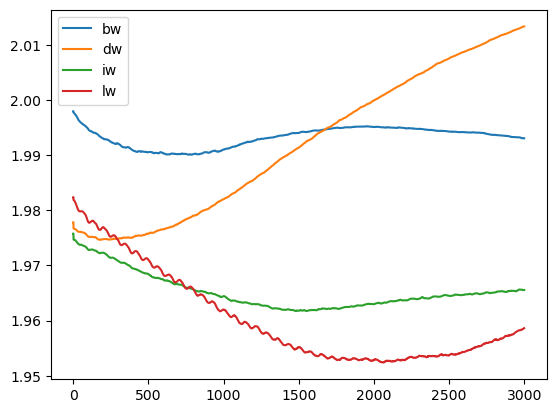

In [29]:
plt.plot(mean_bw.cf-116*mean_bw.pf,label = 'bw')
plt.plot(mean_dw.cf-116*mean_dw.pf,label = 'dw')
plt.plot(mean_iw.cf-116*mean_iw.pf,label = 'iw')
plt.plot(mean_lw.cf-116*mean_lw.pf,label = 'lw')
plt.legend()

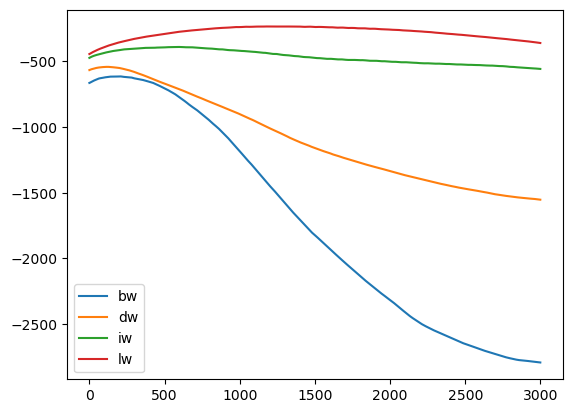

In [30]:
plt.plot(mean_bw.dep,label = 'bw')
plt.plot(mean_dw.dep,label = 'dw')
plt.plot(mean_iw.dep,label = 'iw')
plt.plot(mean_lw.dep,label = 'lw')
plt.legend()

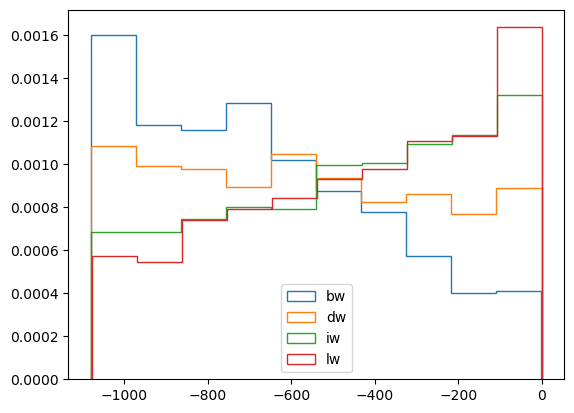

In [31]:
plt.hist(tb.dep[0,ind_bw],label = 'bw',histtype=u'step', density=True)
plt.hist(tb.dep[0,ind_dw],label = 'dw',histtype=u'step', density=True)
plt.hist(tb.dep[0,ind_iw],label = 'iw',histtype=u'step', density=True)
plt.hist(tb.dep[0,ind_lw],label = 'lw',histtype=u'step', density=True)
plt.legend()

In [32]:
crhs_list = ['e_ua_c','c_dif_h','c_dif_v','diccarb','dictflx','forc_c','total_bio']
# crhs_list = ['e_ua_c','c_dif_h','c_dif_v','diccarb','dictflx','forc_c','cdicpflx','cdicrdop','cnegbio']
ctermlist = crhs_list+['tend_c']

In [33]:
# prhs_list = ['e_ua_p','p_dif_h','p_dif_v','s_p']
prhs_list = ['e_ua_p','p_dif_h','p_dif_v','dicrdop','dicpflx','forc_p','negbio']
ptermlist = prhs_list+['tend_p']

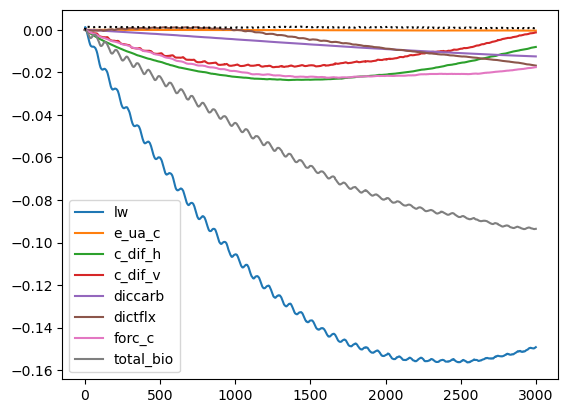

In [34]:
plt.plot(mean_lw.cl - mean_lw.cl[0],label = 'lw')
total = np.zeros(len(mean_lw.cl))
for var in crhs_list:
    line = np.cumsum(np.array(mean_lw[var]))
    plt.plot(line,label = var)
    total+=line
plt.plot(mean_lw.cl - mean_lw.cl[0]-total,':',c = 'k')
plt.legend()

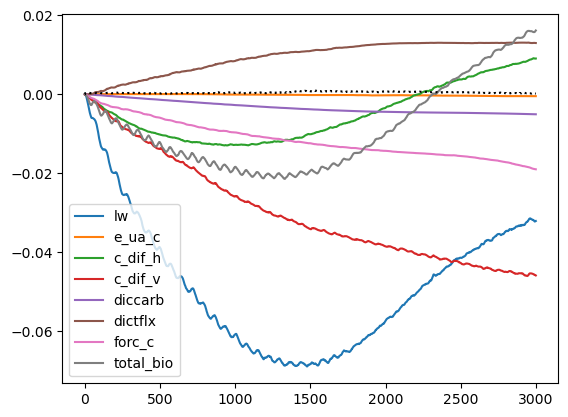

In [35]:
data = mean_iw
plt.plot(data.cl - data.cl[0],label = 'lw')
total = np.zeros(len(data.cl))
for var in crhs_list:
    line = np.cumsum(np.array(data[var]))
    plt.plot(line,label = var)
    total+=line
plt.plot(data.cl - data.cl[0]-total,':',c = 'k')
plt.legend()

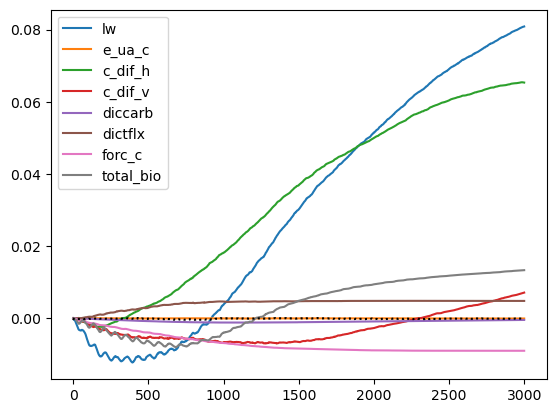

In [36]:
data = mean_dw
plt.plot(data.cl - data.cl[0],label = 'lw')
total = np.zeros(len(data.cl))
for var in crhs_list:
    line = np.cumsum(np.array(data[var]))
    plt.plot(line,label = var)
    total+=line
plt.plot(data.cl - data.cl[0]-total,':',c = 'k')
plt.legend()

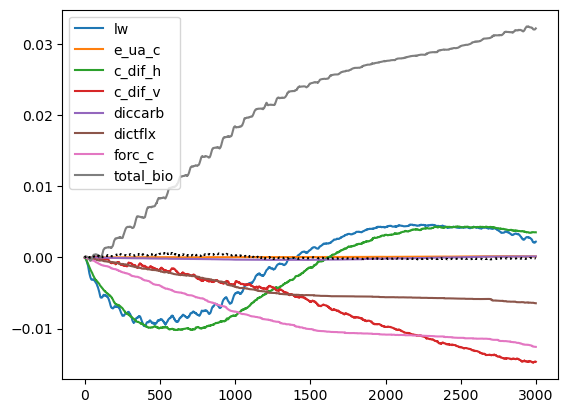

In [37]:
data = mean_bw
plt.plot(data.cl - data.cl[0],label = 'lw')
total = np.zeros(len(data.cl))
for var in crhs_list:
    line = np.cumsum(np.array(data[var]))
    plt.plot(line,label = var)
    total+=line
plt.plot(data.cl - data.cl[0]-total,':',c = 'k')
plt.legend()

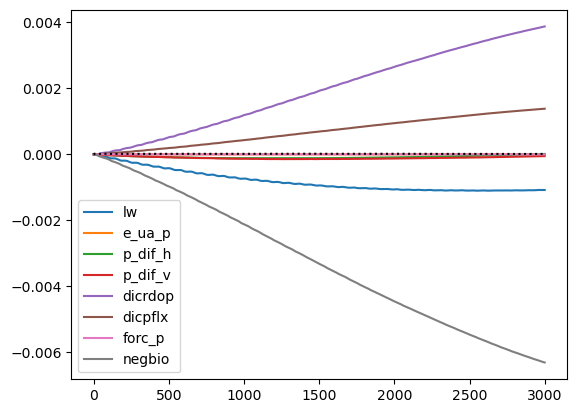

In [38]:
data = mean_lw
plt.plot(data.pl - data.pl[0],label = 'lw')
total = np.zeros(len(data.pl))
for var in prhs_list:
    line = np.cumsum(np.array(data[var]))
    plt.plot(line,label = var)
    total+=line
plt.plot(data.pl - data.pl[0]-total,':',c = 'k')
plt.legend()

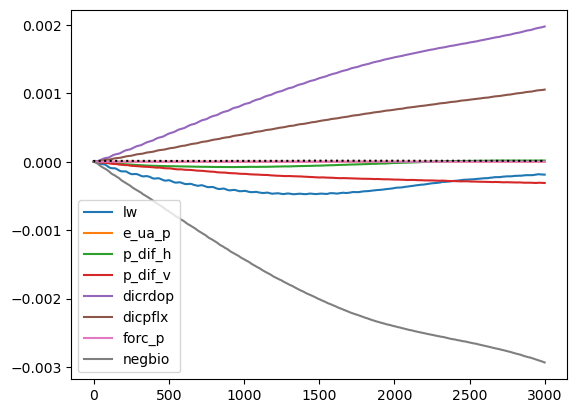

In [39]:
data = mean_iw
plt.plot(data.pl - data.pl[0],label = 'lw')
total = np.zeros(len(data.pl))
for var in prhs_list:
    line = np.cumsum(np.array(data[var]))
    plt.plot(line,label = var)
    total+=line
plt.plot(data.pl - data.pl[0]-total,':',c = 'k')
# plt.xlim(0,10)
# plt.ylim(-0.00001,0.00001)
plt.legend()

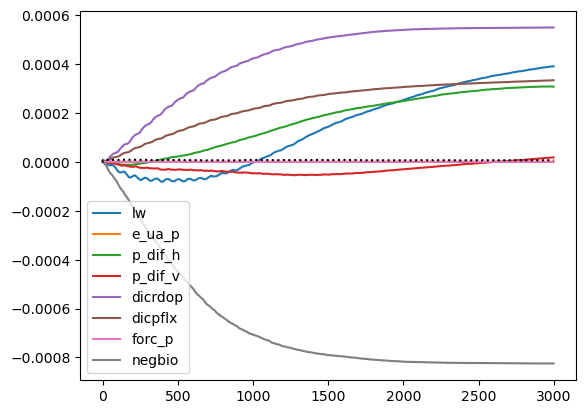

In [40]:
data = mean_dw
plt.plot(data.pl - data.pl[0],label = 'lw')
total = np.zeros(len(data.pl))
for var in prhs_list:
    line = np.cumsum(np.array(data[var]))
    plt.plot(line,label = var)
    total+=line
plt.plot(data.pl - data.pl[0]-total,':',c = 'k')
plt.legend()

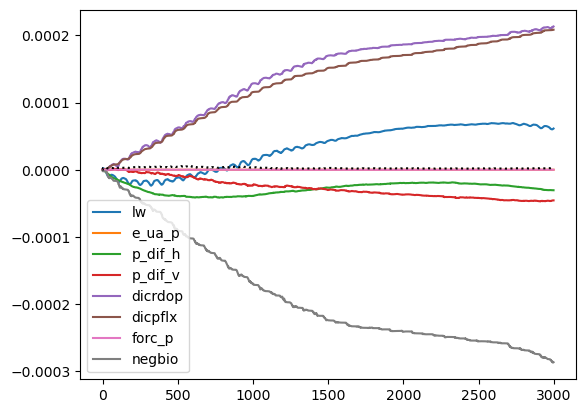

In [41]:
data = mean_bw
plt.plot(data.pl - data.pl[0],label = 'lw')
total = np.zeros(len(data.pl))
for var in prhs_list:
    line = np.cumsum(np.array(data[var]))
    plt.plot(line,label = var)
    total+=line
plt.plot(data.pl - data.pl[0]-total,':',c = 'k')
plt.legend()

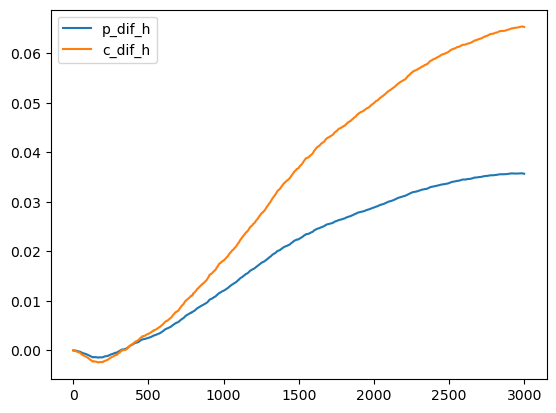

In [42]:
data = mean_dw
for var in ['p_dif_h','c_dif_h']:
    line = np.cumsum(np.array(data[var]))
    if 'p' in var:
        line*=116
    plt.plot(line,label = var)
plt.legend()

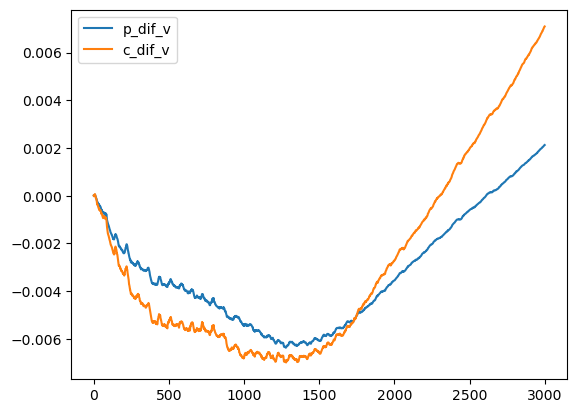

In [43]:
data = mean_dw
for var in ['p_dif_v','c_dif_v']:
    line = np.cumsum(np.array(data[var]))
    if 'p' in var:
        line*=116
    plt.plot(line,label = var)
plt.legend()

In [44]:
# data = mean_lw
# for var in ['cdicpflx']:
#     line = np.cumsum(np.array(data[var]))
#     plt.plot(line,label = var)
# spo4 = +data['dicpflx']#+data['negbio']
# spo4 = np.array(spo4)
# line = np.cumsum(spo4)*117
# plt.plot(line,label='phos')
# plt.legend()

In [45]:
# data = mean_lw
# for var in ['cdicpflx']:
#     line = np.cumsum(np.array(data[var]))
#     plt.plot(line,label = var)
# spo4 = +data['dicpflx']#+data['negbio']
# spo4 = np.array(spo4)
# line = np.cumsum(spo4)*117
# plt.plot(line,label='phos')
# plt.legend()

In [46]:
# data = mean_lw
# for var in ['cdicrdop']:
#     line = np.cumsum(np.array(data[var]))
#     plt.plot(line,label = var)
# spo4 = data['dicrdop']#+data['dicpflx']+data['negbio']
# spo4 = np.array(spo4)
# line = np.cumsum(spo4)*117
# plt.plot(line,label='phos')
# plt.legend()

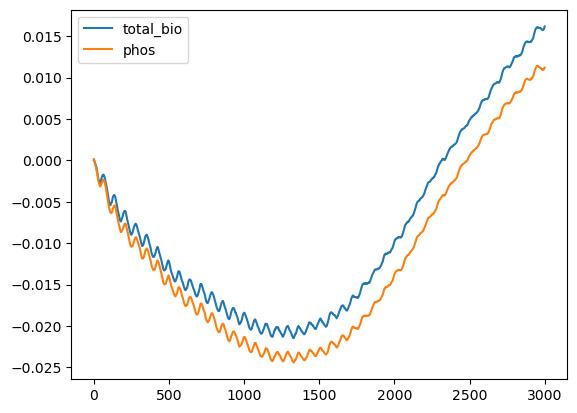

In [57]:
data = mean_iw
for var in ['total_bio']:
    line = np.cumsum(np.array(data[var]))
    plt.plot(line,label = var)
spo4 = data['dicrdop']+data['dicpflx']+data['negbio']
spo4 = np.array(spo4)
line = np.cumsum(spo4)*117
plt.plot(line,label='phos')
plt.legend()

KeyError: 's_p'

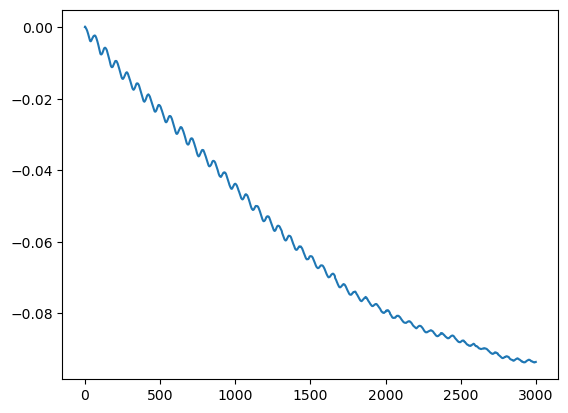

In [48]:
# data = mean_lw
# for var in ['total_bio']:
#     line = np.cumsum(np.array(data[var]))
#     plt.plot(line,label = var)
# spo4 = data['s_p']
# spo4 = np.array(spo4)
# line = np.cumsum(spo4)*117*1.5
# plt.plot(line,label='phos')
# plt.legend()

In [ ]:
data = mean_lw
line = np.cumsum(np.array(data['cdicrdop']+data['cdicpflx']+data['cnegbio']))
plt.plot(line,label = var)
spo4 = data['dicrdop']+data['dicpflx']+data['negbio']
spo4 = np.array(spo4)
line = np.cumsum(spo4)*117
plt.plot(line,label='phos')
plt.legend()

In [ ]:
bins = 50
plt.plot(bw.lat[:,::bins],bw.dep[:,::bins],c = 'r',lw = 0.2)
plt.plot(dw.lat[:,::bins],dw.dep[:,::bins],c = 'g',lw = 0.2)
plt.plot(iw.lat[:,::bins],iw.dep[:,::bins],c = 'b',lw = 0.2)
plt.plot(lw.lat[:,::bins],lw.dep[:,::bins],c = 'k',lw = 0.2)
plt.show()

In [ ]:
bins = 1
plt.plot(bw.lat[0,::bins],bw.dep[0,::bins],'o',c = 'r',markersize = 0.4)
plt.plot(dw.lat[0,::bins],dw.dep[0,::bins],'o',c = 'g',markersize = 0.4)
plt.plot(iw.lat[0,::bins],iw.dep[0,::bins],'o',c = 'b',markersize = 0.4)
plt.plot(lw.lat[0,::bins],lw.dep[0,::bins],'o',c = 'k',markersize = 0.4)
plt.show()

In [ ]:
bins = 1
plt.plot(bw.lat[-1,::bins],bw.dep[-1,::bins],'o',c = 'r',markersize = 0.2)
plt.plot(dw.lat[-1,::bins],dw.dep[-1,::bins],'o',c = 'g',markersize = 0.2)
plt.plot(iw.lat[-1,::bins],iw.dep[-1,::bins],'o',c = 'b',markersize = 0.2)
plt.plot(lw.lat[-1,::bins],lw.dep[-1,::bins],'o',c = 'k',markersize = 0.2)
plt.show()

In [ ]:
from seaduck.utils import to_180

In [ ]:
def plt_traj1(ip,tb = tb):
    # fig,axs = plt.subplots(1,2)
    ax = plt.subplot(2,2,1,projection = ccrs.PlateCarree())
    ax.plot(to_180(tb.lon[:,ip]),tb.lat[:,ip])
    ax.plot(to_180(tb.lon[0,ip]),tb.lat[0,ip],'rD')
    plt.xlim([-180,180])
    plt.ylim([-80,80])
    # ax.set_extent([-80,80,-180,180],crs = ccrs.PlateCarree())
    ax.coastlines()
    ax2 = plt.subplot(2,2,3,sharex = ax)
    ax2.plot(to_180(tb.lon[:,ip]),tb.dep[:,ip])
    ax2.plot(to_180(tb.lon[0,ip]),tb.dep[0,ip],'rD')
    plt.xlim([-180,180])
    ax3 = plt.subplot(2,2,4,sharey = ax2)
    ax3.plot(tb.lat[:,ip],tb.dep[:,ip])
    ax3.plot(tb.lat[0,ip],tb.dep[0,ip],'rD')

    plt.tight_layout()

In [ ]:
plt_traj1(ind_lw[1000])

In [ ]:
vmax  =2e-10
iy=60

In [ ]:
plt.pcolormesh(ds.Y,ds.Z,ds.c_dif_h[0,:,:,:].mean(dim = 'X'),vmax = vmax,vmin = -vmax,cmap = 'bwr')
plt.colorbar()

In [ ]:
plt.pcolormesh(ds.Y,ds.Z,116*ds.p_dif_h[0,:,:,:].mean(dim = 'X'),vmax = vmax,vmin = -vmax,cmap = 'bwr')
plt.colorbar()

In [ ]:
vmax  =5e-10
iy=60

In [ ]:
plt.pcolormesh(ds.Y,ds.Z,ds.c_dif_v[0,:,:,:].mean(dim = 'X'),vmax = vmax,vmin = -vmax,cmap = 'bwr')
plt.colorbar()

In [ ]:
plt.pcolormesh(ds.Y,ds.Z,116*ds.p_dif_v[0,:,:,:].mean(dim = 'X'),vmax = vmax,vmin = -vmax,cmap = 'bwr')
plt.colorbar()

In [ ]:
plt.imshow(ds.c_dif_h[0,0])